In [67]:
import sys
try:
    from osgeo import ogr, osr, gdal
except:
    sys.exit('ERROR: cannot find GDAL/OGR modules')
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [68]:
gdal.UseExceptions()
# example GDAL error handler function
def gdal_error_handler(err_class, err_num, err_msg):
    errtype = {
            gdal.CE_None:'None',
            gdal.CE_Debug:'Debug',
            gdal.CE_Warning:'Warning',
            gdal.CE_Failure:'Failure',
            gdal.CE_Fatal:'Fatal'
    }
    err_msg = err_msg.replace('\n',' ')
    err_class = errtype.get(err_class, 'None')
    print ('Error Number: %s' % (err_num))
    print ('Error Type: %s' % (err_class))
    print ('Error Message: %s' % (err_msg))

if __name__=='__main__':

    # install error handler
    gdal.PushErrorHandler(gdal_error_handler)

# The City we choose in this analysis is Antalya, 36.9°N 30.7°E
range(36.85°N- 36.97°N, 30.6°N- 30.8°N) +- 0.12 Lat, +- 0.2 Lon

In [74]:
#calculating average radiance, moon_phase_angel, moon_illumination_fraction for every day in June 
#ramadan 2015 in Turkey starts from 6.18 - 7.16
#before_ramadan_data from 139-168(datafile name number)
#ramadan_data from 169-197(datafile name number)
#after_ramadan_data from 198-228(datafile name number)


#following is for before ramadan 2015 5.18-6.18
radiance_br = []
moon_phase_br = []
illumination_br = []
radiance_sea_br = []
moon_phase_sea_br = []
illumination_sea_br = []

for i in range(139,169):
    file_path = "C:/Users/zz7/Desktop/vpn46_data/before_Ramadan_2015/VNP46A1.A2015%d.h20v05.001.h5" % i
    gdal_dataset = gdal.Open (file_path)    
    # Let's create a list with the selected layer names
    selected_layers = ["Moon_Illumination_Fraction", "Moon_Phase_Angle","DNB_At_Sensor_Radiance_500m"]
    # We will store the data in a dictionary
    # Initialise an empty dictionary
    data = {}
    # for convenience, we will use string substitution to create a 
    # template for GDAL filenames, which we'll substitute on the fly:
    file_template ='HDF5:"C:/Users/zz7/Desktop/vpn46_data/before_Ramadan_2015/VNP46A1.A2015%d.h20v05.001.h5"://HDFEOS/GRIDS/VNP_Grid_DNB/Data_Fields/%s'
    for j, layer in enumerate ( selected_layers ):
        this_file = file_template % (i,layer)
        #print("Opening Layer %d: %s" % (i+1, this_file ))
        g = gdal.Open ( this_file )
        if g is None:
            raise IOError
        data[layer] = g.ReadAsArray() 
        #print("\t>>> Read %s!" % layer)
        
    radiance_temp = data['DNB_At_Sensor_Radiance_500m'] 
    moon_phase_angle_temp = data['Moon_Phase_Angle']
    moon_illumination_frac_temp = data['Moon_Illumination_Fraction']
    row_l = radiance_temp.shape[0]
    col_l = radiance_temp.shape[1]
    sum_radiance = 0
    sum_moon_phase = 0
    sum_illumination = 0
    
    #choose 250 because 250 pixels are around 1 lon and 1 lat
    # i is LAT, j is Lon, city coordinates(36.9 N 30.7 E), pixel leftcorner(30 N 22.5 E)
    # so i range(row_l - 6.8*250 - 125, row_l - 6.8*250 + 125), j range(7.2*250 - 125, 7.2*250 + 125)
    
    for i in range(row_l - int(6.9*250) - int(0.12*250/2), row_l - int(6.9*250) + int(0.12*250/2)):
        for j in range(int(8.2*250) - int(0.2*250/2), int(8.2*250) + int(0.2*250/2)):
            sum_radiance += radiance_temp[i][j]
            sum_moon_phase += moon_phase_angle_temp[i][j]
            sum_illumination += moon_illumination_frac_temp[i][j]
            
    sum_sea_radiance = 0
    sum_sea_moon_phase = 0
    sum_sea_illumination = 0
    
    # 250 pixels are around 1 lon and 1 lat,
    # i is LAT, j is Lon, sea coordinates(36 N 31 E), pixel leftcorner(30 N 22.5 E)
    # so i range(row_l - 6*250 - 62, row_l - 6*250 + 63), j range(8.5*250 - 62, 8.5*250 + 63)
    
    for i in range(row_l - 6*250 - 62, row_l - 6*250 + 63):
        for j in range(int(8.5*250) - 62, int(8.5*250) + 63):
            sum_sea_radiance += radiance_temp[i][j]
            sum_sea_moon_phase += moon_phase_angle_temp[i][j]
            sum_sea_illumination += moon_illumination_frac_temp[i][j]
    
    #take cell avergae and multiply by the scale factor in corresponding NASA documentations
    #then divide the number of  pixels in total
    avg_radiance = sum_radiance/(0.12*250*0.2*250) *0.1
    avg_moon_phase = sum_moon_phase/(0.12*250*0.2*250) *0.01
    avg_illumination = sum_illumination/(0.12*250*0.2*250) *0.01
    #append to June array
    radiance_br.append(avg_radiance)
    moon_phase_br.append(avg_moon_phase)
    illumination_br.append(avg_illumination)
    
    #take cell avergae and multiply by the scale factor in corresponding NASA documentations
    avg_sea_radiance = sum_sea_radiance/(125**2) *0.1
    avg_sea_moon_phase = sum_sea_moon_phase/(125**2) *0.01
    avg_sea_illumination = sum_sea_illumination/(125**2) *0.01
    #append to June array
    radiance_sea_br.append(avg_sea_radiance)
    moon_phase_sea_br.append(avg_sea_moon_phase)
    illumination_sea_br.append(avg_sea_illumination)
    

In [75]:
#calculating average radiance, moon_phase_angel, moon_illumination_fraction for every day in June 
#ramadan 2015 in Turkey starts from 6.18 - 7.16
#before_ramadan_data from 139-168(datafile name number)
#ramadan_data from 169-197(datafile name number)
#after_ramadan_data from 198-228(datafile name number)


#following is for ramadan 2015 6.18-7.16
radiance_r = []
moon_phase_r = []
illumination_r = []
radiance_sea_r = []
moon_phase_sea_r = []
illumination_sea_r = []

for i in range(169,199):
    file_path = "C:/Users/zz7/Desktop/vpn46_data/Ramadan_2015/VNP46A1.A2015%d.h20v05.001.h5" % i
    gdal_dataset = gdal.Open (file_path)    
    # Let's create a list with the selected layer names
    selected_layers = ["Moon_Illumination_Fraction", "Moon_Phase_Angle","DNB_At_Sensor_Radiance_500m"]
    # We will store the data in a dictionary
    # Initialise an empty dictionary
    data = {}
    # for convenience, we will use string substitution to create a 
    # template for GDAL filenames, which we'll substitute on the fly:
    file_template ='HDF5:"C:/Users/zz7/Desktop/vpn46_data/Ramadan_2015/VNP46A1.A2015%d.h20v05.001.h5"://HDFEOS/GRIDS/VNP_Grid_DNB/Data_Fields/%s'
    for j, layer in enumerate ( selected_layers ):
        this_file = file_template % (i,layer)
        #print("Opening Layer %d: %s" % (i+1, this_file ))
        g = gdal.Open ( this_file )
        if g is None:
            raise IOError
        data[layer] = g.ReadAsArray() 
        #print("\t>>> Read %s!" % layer)
        
    radiance_temp = data['DNB_At_Sensor_Radiance_500m'] 
    moon_phase_angle_temp = data['Moon_Phase_Angle']
    moon_illumination_frac_temp = data['Moon_Illumination_Fraction']
    row_l = radiance_temp.shape[0]
    col_l = radiance_temp.shape[1]
    sum_radiance = 0
    sum_moon_phase = 0
    sum_illumination = 0
    
    #choose 250 because 250 pixels are around 1 lon and 1 lat
    # i is LAT, j is Lon, city coordinates(36.9 N 30.7 E), pixel leftcorner(30 N 22.5 E)
    # so i range(row_l - 6.8*250 - 125, row_l - 6.8*250 + 125), j range(7.2*250 - 125, 7.2*250 + 125)
    
    for i in range(row_l - int(6.9*250) - int(0.12*250/2), row_l - int(6.9*250) + int(0.12*250/2)):
        for j in range(int(8.2*250) - int(0.2*250/2), int(8.2*250) + int(0.2*250/2)):
            sum_radiance += radiance_temp[i][j]
            sum_moon_phase += moon_phase_angle_temp[i][j]
            sum_illumination += moon_illumination_frac_temp[i][j]
            
    sum_sea_radiance = 0
    sum_sea_moon_phase = 0
    sum_sea_illumination = 0
    
    # 250 pixels are around 1 lon and 1 lat,
    # i is LAT, j is Lon, sea coordinates(36 N 31 E), pixel leftcorner(30 N 22.5 E)
    # so i range(row_l - 6*250 - 62, row_l - 6*250 + 63), j range(8.5*250 - 62, 8.5*250 + 63)
    
    for i in range(row_l - 6*250 - 62, row_l - 6*250 + 63):
        for j in range(int(8.5*250) - 62, int(8.5*250) + 63):
            sum_sea_radiance += radiance_temp[i][j]
            sum_sea_moon_phase += moon_phase_angle_temp[i][j]
            sum_sea_illumination += moon_illumination_frac_temp[i][j]
    
    #take cell avergae and multiply by the scale factor in corresponding NASA documentations
    #then divide the number of  pixels in total
    avg_radiance = sum_radiance/(0.12*250*0.2*250) *0.1
    avg_moon_phase = sum_moon_phase/(0.12*250*0.2*250) *0.01
    avg_illumination = sum_illumination/(0.12*250*0.2*250) *0.01
    #append to June array
    radiance_r.append(avg_radiance)
    moon_phase_r.append(avg_moon_phase)
    illumination_r.append(avg_illumination)
    
    #take cell avergae and multiply by the scale factor in corresponding NASA documentations
    avg_sea_radiance = sum_sea_radiance/(125**2) *0.1
    avg_sea_moon_phase = sum_sea_moon_phase/(125**2) *0.01
    avg_sea_illumination = sum_sea_illumination/(125**2) *0.01
    #append to June array
    radiance_sea_r.append(avg_sea_radiance)
    moon_phase_sea_r.append(avg_sea_moon_phase)
    illumination_sea_r.append(avg_sea_illumination)
    

In [76]:
#calculating average radiance, moon_phase_angel, moon_illumination_fraction for every day in June 
#ramadan 2015 in Turkey starts from 6.18 - 7.16
#before_ramadan_data from 139-168(datafile name number)
#ramadan_data from 169-197(datafile name number)
#after_ramadan_data from 198-228(datafile name number)


#following is for after ramadan 2015 7.16-8.16
radiance_ar = []
moon_phase_ar = []
illumination_ar = []
radiance_sea_ar = []
moon_phase_sea_ar = []
illumination_sea_ar = []

for i in range(199,229):
    file_path = "C:/Users/zz7/Desktop/vpn46_data/after_Ramadan_2015/VNP46A1.A2015%d.h20v05.001.h5" % i
    gdal_dataset = gdal.Open (file_path)    
    # Let's create a list with the selected layer names
    selected_layers = ["Moon_Illumination_Fraction", "Moon_Phase_Angle","DNB_At_Sensor_Radiance_500m"]
    # We will store the data in a dictionary
    # Initialise an empty dictionary
    data = {}
    # for convenience, we will use string substitution to create a 
    # template for GDAL filenames, which we'll substitute on the fly:
    file_template ='HDF5:"C:/Users/zz7/Desktop/vpn46_data/after_Ramadan_2015/VNP46A1.A2015%d.h20v05.001.h5"://HDFEOS/GRIDS/VNP_Grid_DNB/Data_Fields/%s'
    for j, layer in enumerate ( selected_layers ):
        this_file = file_template % (i,layer)
        #print("Opening Layer %d: %s" % (i+1, this_file ))
        g = gdal.Open ( this_file )
        if g is None:
            raise IOError
        data[layer] = g.ReadAsArray() 
        #print("\t>>> Read %s!" % layer)
        
    radiance_temp = data['DNB_At_Sensor_Radiance_500m'] 
    moon_phase_angle_temp = data['Moon_Phase_Angle']
    moon_illumination_frac_temp = data['Moon_Illumination_Fraction']
    row_l = radiance_temp.shape[0]
    col_l = radiance_temp.shape[1]
    sum_radiance = 0
    sum_moon_phase = 0
    sum_illumination = 0
    
    #choose 250 because 250 pixels are around 1 lon and 1 lat
    # i is LAT, j is Lon, city coordinates(36.9 N 30.7 E), pixel leftcorner(30 N 22.5 E)
    # so i range(row_l - 6.8*250 - 125, row_l - 6.8*250 + 125), j range(7.2*250 - 125, 7.2*250 + 125)
    
    for i in range(row_l - int(6.9*250) - int(0.12*250/2), row_l - int(6.9*250) + int(0.12*250/2)):
        for j in range(int(8.2*250) - int(0.2*250/2), int(8.2*250) + int(0.2*250/2)):
            sum_radiance += radiance_temp[i][j]
            sum_moon_phase += moon_phase_angle_temp[i][j]
            sum_illumination += moon_illumination_frac_temp[i][j]
            
    sum_sea_radiance = 0
    sum_sea_moon_phase = 0
    sum_sea_illumination = 0
    
    # 250 pixels are around 1 lon and 1 lat,
    # i is LAT, j is Lon, sea coordinates(36 N 31 E), pixel leftcorner(30 N 22.5 E)
    # so i range(row_l - 6*250 - 62, row_l - 6*250 + 63), j range(8.5*250 - 62, 8.5*250 + 63)
    
    for i in range(row_l - 6*250 - 62, row_l - 6*250 + 63):
        for j in range(int(8.5*250) - 62, int(8.5*250) + 63):
            sum_sea_radiance += radiance_temp[i][j]
            sum_sea_moon_phase += moon_phase_angle_temp[i][j]
            sum_sea_illumination += moon_illumination_frac_temp[i][j]
    
    #take cell avergae and multiply by the scale factor in corresponding NASA documentations
    #then divide the number of  pixels in total
    avg_radiance = sum_radiance/(0.12*250*0.2*250) *0.1
    avg_moon_phase = sum_moon_phase/(0.12*250*0.2*250) *0.01
    avg_illumination = sum_illumination/(0.12*250*0.2*250) *0.01
    #append to June array
    radiance_ar.append(avg_radiance)
    moon_phase_ar.append(avg_moon_phase)
    illumination_ar.append(avg_illumination)
    
    #take cell avergae and multiply by the scale factor in corresponding NASA documentations
    avg_sea_radiance = sum_sea_radiance/(125**2) *0.1
    avg_sea_moon_phase = sum_sea_moon_phase/(125**2) *0.01
    avg_sea_illumination = sum_sea_illumination/(125**2) *0.01
    #append to June array
    
    radiance_sea_ar.append(avg_sea_radiance)
    moon_phase_sea_ar.append(avg_sea_moon_phase)
    illumination_sea_ar.append(avg_sea_illumination)
    

In [77]:
print(len(radiance_r),len(radiance_ar),len(radiance_br))
print(radiance_br)

30 30 30
[0.7054, 0.7972666666666668, 1.1439333333333335, 0.8048666666666668, 0.9934, 0.8070666666666666, 0.6995333333333333, 0.7896000000000001, 1.0952, 0.6451333333333333, 0.7249333333333334, 2.2070000000000003, 2.5948, 2.1255333333333333, 3.5484000000000004, 2.439066666666667, 2.206, 2.4388666666666667, 1.999266666666667, 1.5182666666666667, 0.9790666666666668, 0.9316000000000001, 0.6417333333333334, 0.7998000000000001, 0.755, 0.5016, 0.5010666666666667, 0.572, 0.7827333333333334, 0.9325333333333333]


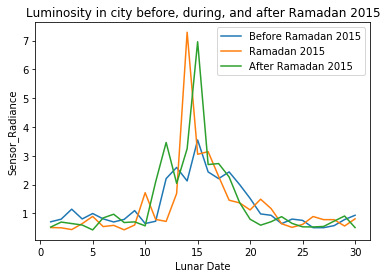

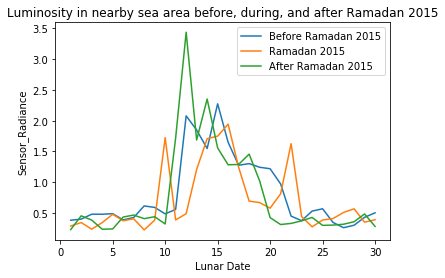

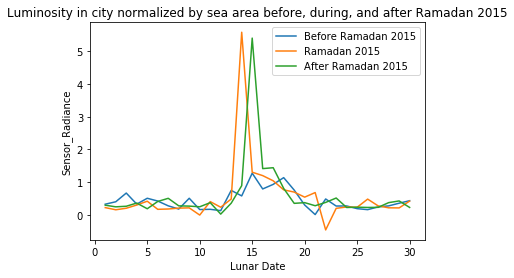

In [78]:
date = list(range(1,31))
first, = plt.plot(date, radiance_br, label = "Before Ramadan 2015")
second, = plt.plot(date, radiance_r, label = "Ramadan 2015")
third, = plt.plot(date, radiance_ar, label ="After Ramadan 2015")
plt.legend(handles=[first,second,third])
plt.xlabel("Lunar Date")
plt.ylabel("Sensor_Radiance")
plt.title("Luminosity in city before, during, and after Ramadan 2015")
plt.show()

first, = plt.plot(date, radiance_sea_br, label = "Before Ramadan 2015")
second, = plt.plot(date, radiance_sea_r, label = "Ramadan 2015")
third, = plt.plot(date, radiance_sea_ar, label ="After Ramadan 2015")
plt.legend(handles=[first,second,third])
plt.xlabel("Lunar Date")
plt.ylabel("Sensor_Radiance")
plt.title("Luminosity in nearby sea area before, during, and after Ramadan 2015")
plt.show()

first, = plt.plot(date, np.asarray(radiance_br) - np.asarray(radiance_sea_br), label = "Before Ramadan 2015")
second, = plt.plot(date, np.asarray(radiance_r) - np.asarray(radiance_sea_r), label = "Ramadan 2015")
third, = plt.plot(date, np.asarray(radiance_ar) - np.asarray(radiance_sea_ar), label ="After Ramadan 2015")
plt.legend(handles=[first,second,third])
plt.xlabel("Lunar Date")
plt.ylabel("Sensor_Radiance")
plt.title("Luminosity in city normalized by sea area before, during, and after Ramadan 2015")
plt.show()


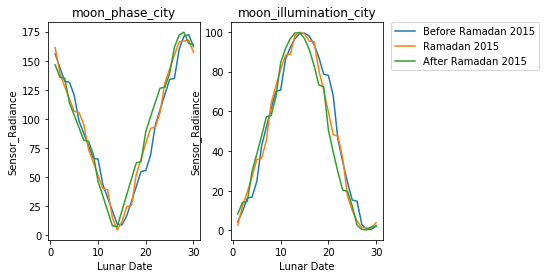

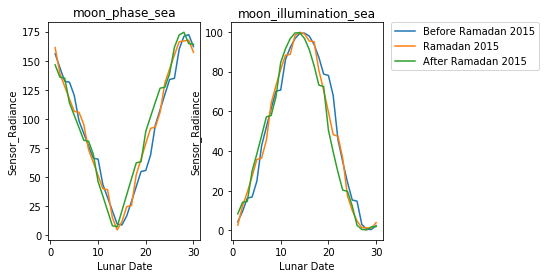

In [60]:
plt.subplot(1, 2, 1)
plt.plot(date, moon_phase_br, label = "Before Ramadan 2015")
plt.plot(date, moon_phase_r, label = "Ramadan 2015")
plt.plot(date, moon_phase_ar, label ="After Ramadan 2015")
plt.xlabel("Lunar Date")
plt.ylabel("Sensor_Radiance")
plt.title("moon_phase_city")

plt.subplot(1, 2, 2)
plt.plot(date,illumination_sea_br, label = "Before Ramadan 2015")
plt.plot(date, illumination_sea_r, label = "Ramadan 2015")
plt.plot(date, illumination_sea_ar, label ="After Ramadan 2015")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("Lunar Date")
plt.ylabel("Sensor_Radiance")
plt.title("moon_illumination_city")
plt.show()

plt.subplot(1, 2, 1)
plt.plot(date, moon_phase_sea_br, label = "Before Ramadan 2015")
plt.plot(date, moon_phase_sea_r, label = "Ramadan 2015")
plt.plot(date, moon_phase_sea_ar, label ="After Ramadan 2015")
plt.xlabel("Lunar Date")
plt.ylabel("Sensor_Radiance")
plt.title("moon_phase_sea")

plt.subplot(1, 2, 2)
plt.plot(date,illumination_sea_br, label = "Before Ramadan 2015")
plt.plot(date, illumination_sea_r, label = "Ramadan 2015")
plt.plot(date, illumination_sea_ar, label ="After Ramadan 2015")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("Lunar Date")
plt.ylabel("Sensor_Radiance")
plt.title("moon_illumination_sea")
plt.show()

In [9]:
"""
lc_data = gdal.Open('HDF4_EOS:EOS_SWATH:"C:/Users/zz7/Desktop/Data/Data20150601.2254.hdf":VIIRS_EV_DNB_SDR:Radiance')
trail = lc_data.GetGeoTransform()
print(trail) 
c = x-coordinate of the upper-left corner of the upper-left pixel
a = width of a pixel
b = row rotation (typically zero)
f = y-coordinate of the of the upper-left corner of the upper-left pixel
d = column rotation (typically zero)
e = height of a pixel (typically negative)
"""

'\nlc_data = gdal.Open(\'HDF4_EOS:EOS_SWATH:"C:/Users/zz7/Desktop/Data/Data20150601.2254.hdf":VIIRS_EV_DNB_SDR:Radiance\')\ntrail = lc_data.GetGeoTransform()\nprint(trail) \nc = x-coordinate of the upper-left corner of the upper-left pixel\na = width of a pixel\nb = row rotation (typically zero)\nf = y-coordinate of the of the upper-left corner of the upper-left pixel\nd = column rotation (typically zero)\ne = height of a pixel (typically negative)\n'